In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/projet_bio_info/data/genes_preprocessed_clean.csv')



In [5]:
# Aperçu rapide
print(df.shape)


(70620, 25)


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70620 entries, 0 to 70619
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tax_id                  70620 non-null  int64  
 1   GeneID                  70620 non-null  int64  
 2   Symbol                  70620 non-null  object 
 3   chromosome              67204 non-null  float64
 4   map_location            70620 non-null  object 
 5   description             70620 non-null  object 
 6   type_of_gene            70620 non-null  object 
 7   Modification_date       70620 non-null  int64  
 8   chrom_num               70620 non-null  object 
 9   arm                     70620 non-null  object 
 10  band                    61892 non-null  float64
 11  desc_length             70620 non-null  int64  
 12  arm_encoded             70620 non-null  int64  
 13  chrom_encoded           70620 non-null  int64  
 14  type_biological-region  70620 non-null

In [10]:
df.head()


,tax_id,GeneID,Symbol,chromosome,map_location,description,type_of_gene,Modification_date,chrom_num,arm,...,type_ncRNA,type_other,type_protein-coding,type_pseudo,type_rRNA,type_scRNA,type_snRNA,type_snoRNA,type_tRNA,type_unknown
0,9606,1,A1BG,19.0,19q13.43,alpha-1-B glycoprotein,protein-coding,20251125,19,q,...,False,False,True,False,False,False,False,False,False,False
1,9606,2,A2M,12.0,12p13.31,alpha-2-macroglobulin,protein-coding,20251125,12,p,...,False,False,True,False,False,False,False,False,False,False
2,9606,9,NAT1,8.0,8p22,N-acetyltransferase 1,protein-coding,20251125,8,p,...,False,False,True,False,False,False,False,False,False,False
3,9606,10,NAT2,8.0,8p22,N-acetyltransferase 2,protein-coding,20251125,8,p,...,False,False,True,False,False,False,False,False,False,False
4,9606,11,NATP,8.0,8p22,N-acetyltransferase pseudogene,pseudo,20251125,8,p,...,False,False,False,True,False,False,False,False,False,False


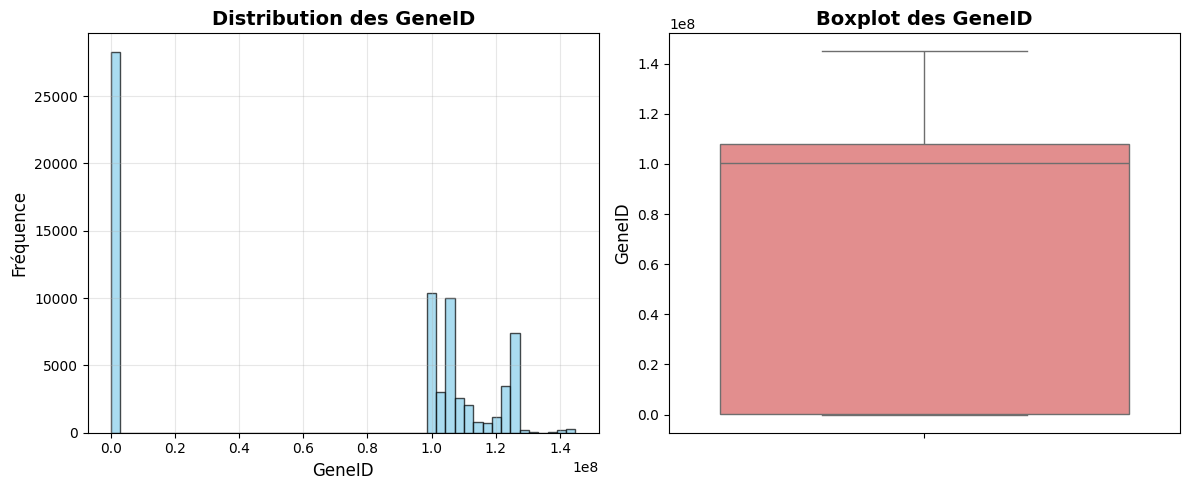

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['GeneID'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution des GeneID', fontsize=14, fontweight='bold')
plt.xlabel('GeneID', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['GeneID'], color='lightcoral')
plt.title('Boxplot des GeneID', fontsize=14, fontweight='bold')
plt.ylabel('GeneID', fontsize=12)

plt.tight_layout()
plt.show()

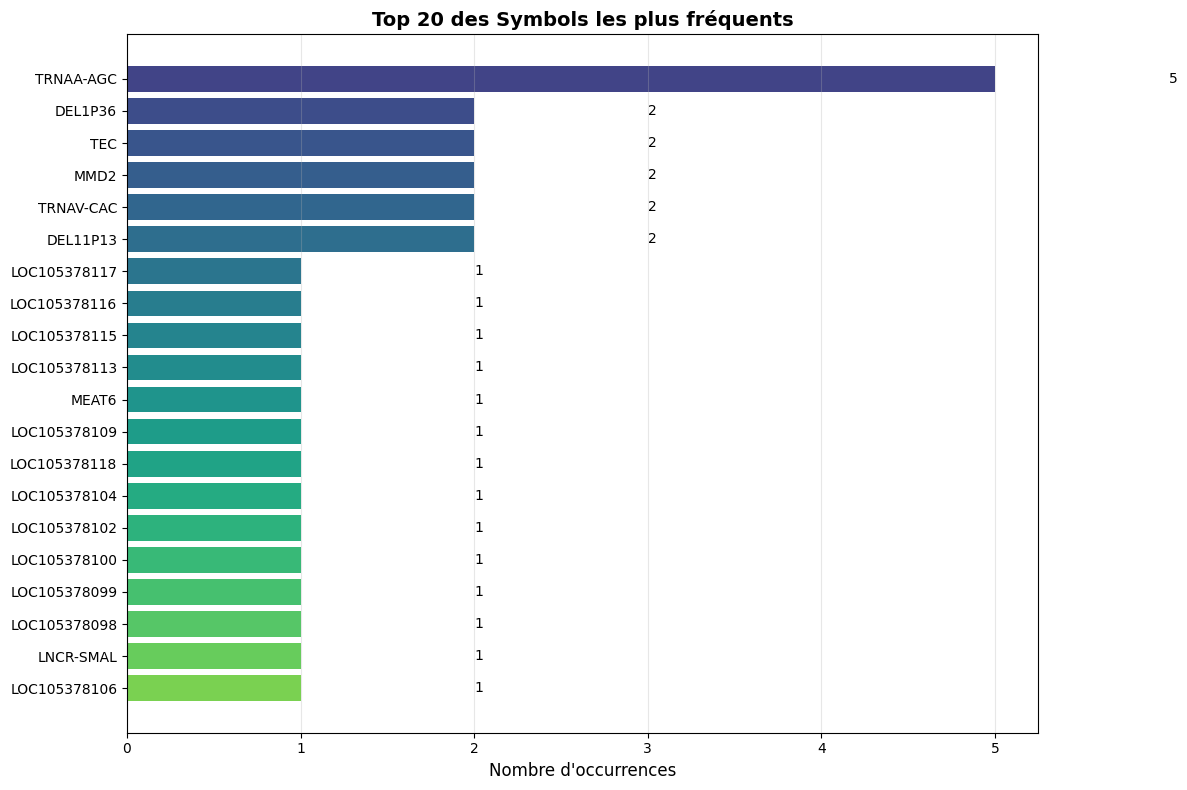

In [23]:
plt.figure(figsize=(12, 8))
top_symbols = df['Symbol'].value_counts().head(20)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_symbols)))
bars = plt.barh(range(len(top_symbols)), top_symbols.values[::-1], color=colors[::-1])
plt.yticks(range(len(top_symbols)), top_symbols.index[::-1])
plt.title('Top 20 des Symbols les plus fréquents', fontsize=14, fontweight='bold')
plt.xlabel('Nombre d\'occurrences', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for i, (bar, count) in enumerate(zip(bars, top_symbols.values[::-1])):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{count}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

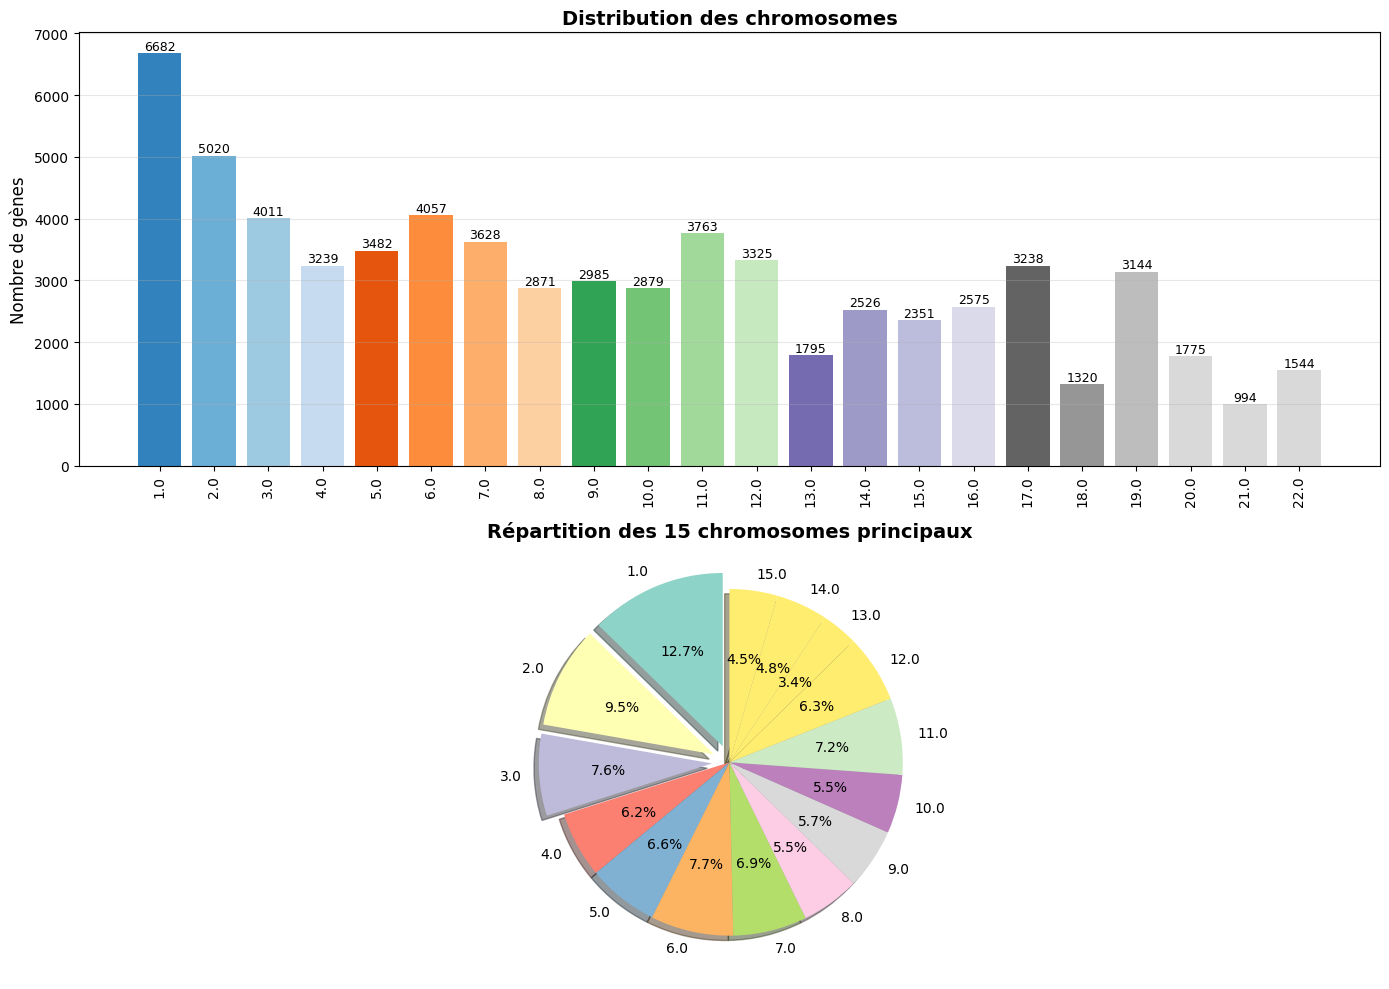

In [24]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
chrom_counts = df['chromosome'].value_counts().sort_index()
x_pos = np.arange(len(chrom_counts))
colors = plt.cm.tab20c(np.arange(len(chrom_counts)))

bars = plt.bar(x_pos, chrom_counts.values, color=colors)
plt.xticks(x_pos, chrom_counts.index, rotation=90)
plt.title('Distribution des chromosomes', fontsize=14, fontweight='bold')
plt.ylabel('Nombre de gènes', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, chrom_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            f'{count}', ha='center', va='bottom', fontsize=9)

plt.subplot(2, 1, 2)
top_chromosomes = chrom_counts.head(15)
explode = [0.1 if i < 3 else 0 for i in range(len(top_chromosomes))]
plt.pie(top_chromosomes.values, labels=top_chromosomes.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Set3(np.arange(len(top_chromosomes))),
        explode=explode, shadow=True)
plt.title('Répartition des 15 chromosomes principaux', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

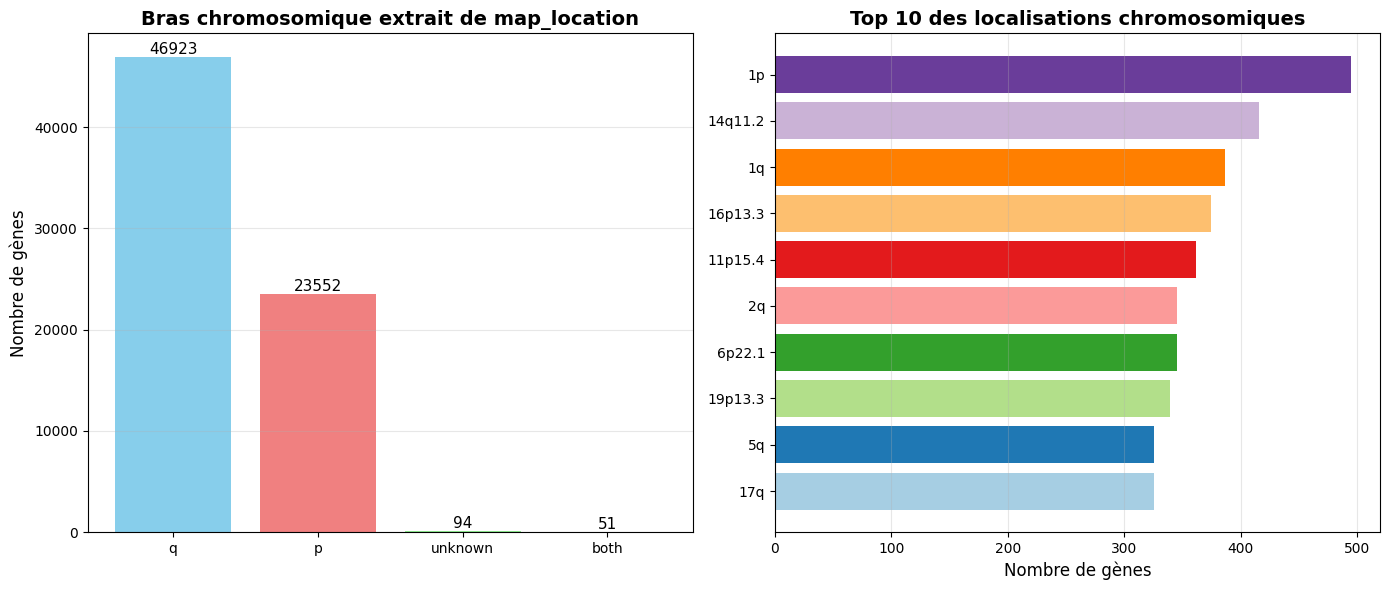

In [25]:
# Préparation des données
def extract_arm_from_map(map_loc):
    if pd.isna(map_loc):
        return 'unknown'
    map_str = str(map_loc)
    if 'p' in map_str and 'q' in map_str:
        return 'both'
    elif 'p' in map_str:
        return 'p'
    elif 'q' in map_str:
        return 'q'
    else:
        return 'unknown'

df['map_arm'] = df['map_location'].apply(extract_arm_from_map)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
arm_counts = df['map_arm'].value_counts()
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
bars = plt.bar(range(len(arm_counts)), arm_counts.values, color=colors)
plt.xticks(range(len(arm_counts)), arm_counts.index)
plt.title('Bras chromosomique extrait de map_location', fontsize=14, fontweight='bold')
plt.ylabel('Nombre de gènes', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, arm_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            f'{count}', ha='center', va='bottom', fontsize=11)

plt.subplot(1, 2, 2)
top_locations = df['map_location'].value_counts().head(10)
x_pos = np.arange(len(top_locations))
plt.barh(x_pos, top_locations.values[::-1], color=plt.cm.Paired(np.arange(len(top_locations))))
plt.yticks(x_pos, top_locations.index[::-1])
plt.title('Top 10 des localisations chromosomiques', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de gènes', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

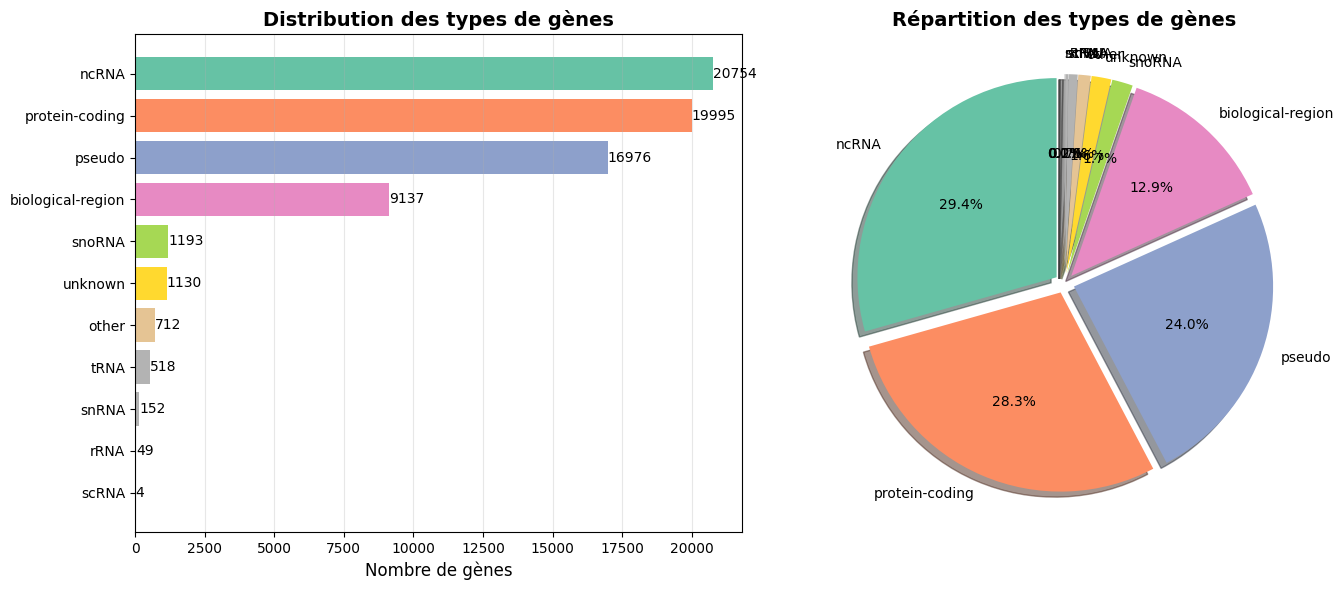

In [26]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
type_counts = df['type_of_gene'].value_counts()
colors = plt.cm.Set2(np.arange(len(type_counts)))
bars = plt.barh(range(len(type_counts)), type_counts.values[::-1], color=colors[::-1])
plt.yticks(range(len(type_counts)), type_counts.index[::-1])
plt.title('Distribution des types de gènes', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de gènes', fontsize=12)
plt.grid(axis='x', alpha=0.3)

for bar, count in zip(bars, type_counts.values[::-1]):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{count}', va='center', fontsize=10)

plt.subplot(1, 2, 2)
explode = [0.05] * len(type_counts)
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Set2(np.arange(len(type_counts))),
        explode=explode, shadow=True)
plt.title('Répartition des types de gènes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1839015299.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_year_data['month'] = last_year_data['Modification_date'].dt.month


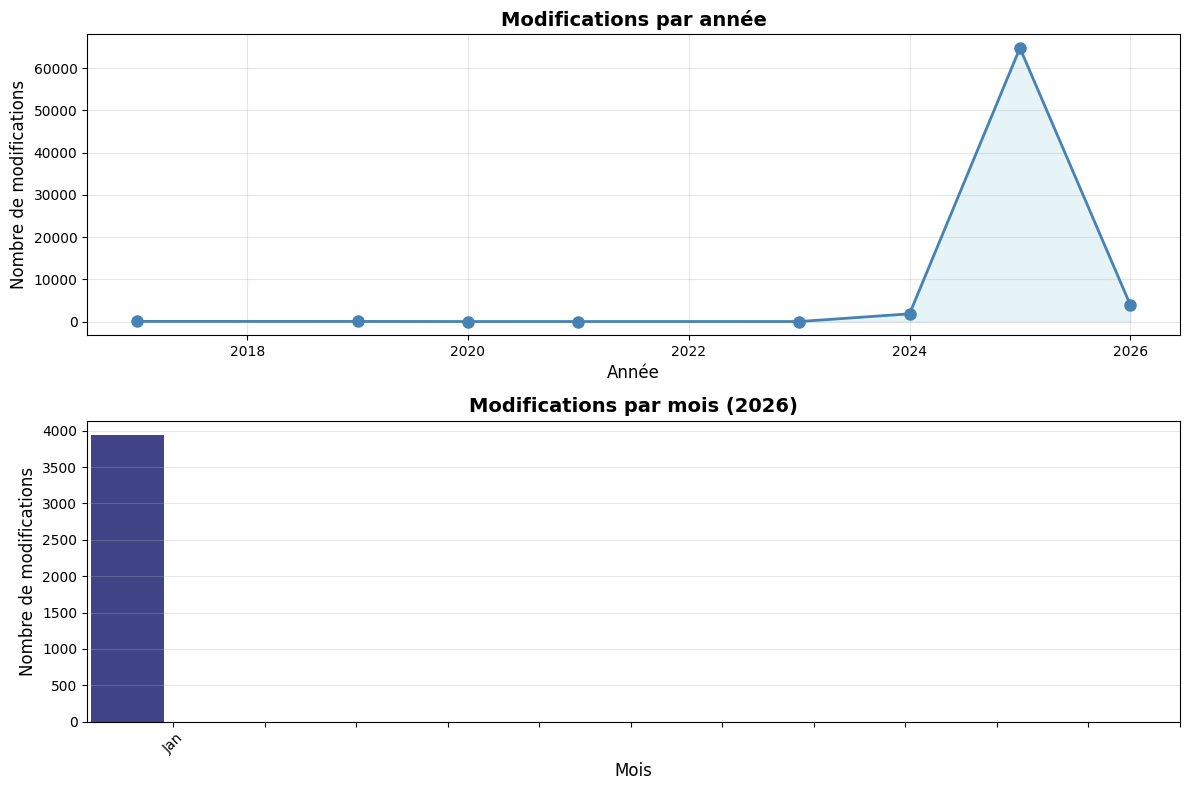

In [27]:
# Convertir en datetime
df['Modification_date'] = pd.to_datetime(df['Modification_date'], format='%Y%m%d', errors='coerce')
df['year'] = df['Modification_date'].dt.year

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
year_counts = df['year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=2,
         markersize=8, color='steelblue')
plt.fill_between(year_counts.index, year_counts.values, alpha=0.3, color='lightblue')
plt.title('Modifications par année', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de modifications', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
last_year = df['year'].max()
if not pd.isna(last_year):
    last_year_data = df[df['year'] == last_year]
    last_year_data['month'] = last_year_data['Modification_date'].dt.month
    month_counts = last_year_data['month'].value_counts().sort_index()

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_labels = [months[i-1] if i in month_counts.index else '' for i in range(1, 13)]

    plt.bar(month_counts.index - 0.5, month_counts.values, width=0.8,
            color=plt.cm.viridis(np.linspace(0.2, 0.8, len(month_counts))))
    plt.xticks(range(1, 13), month_labels, rotation=45)
    plt.title(f'Modifications par mois ({int(last_year)})', fontsize=14, fontweight='bold')
    plt.ylabel('Nombre de modifications', fontsize=12)
    plt.xlabel('Mois', fontsize=12)
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

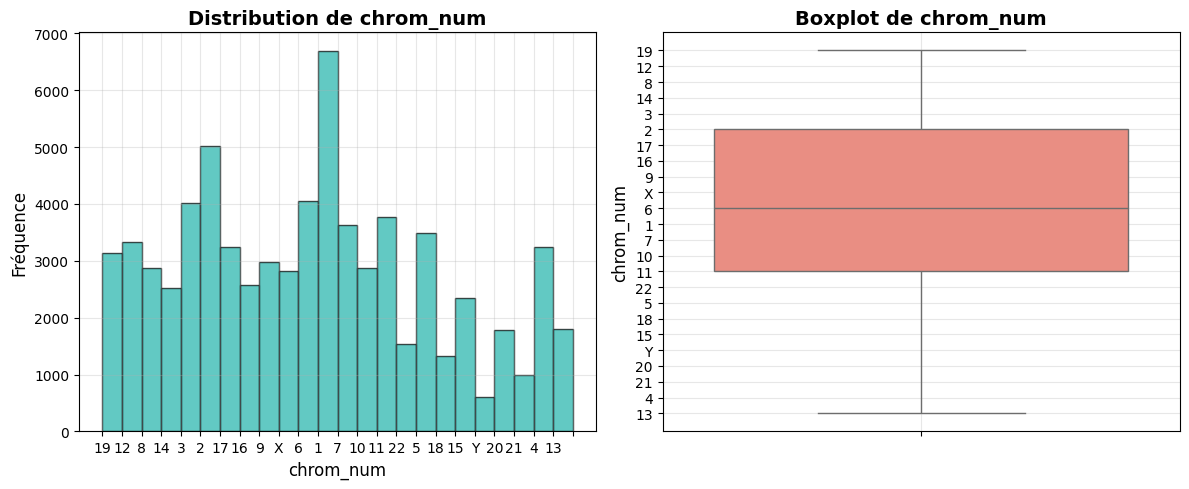

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['chrom_num'].dropna(), bins=range(0, 25), edgecolor='black',
         alpha=0.7, color='lightseagreen')
plt.title('Distribution de chrom_num', fontsize=14, fontweight='bold')
plt.xlabel('chrom_num', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xticks(range(0, 25))
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['chrom_num'], color='salmon')
plt.title('Boxplot de chrom_num', fontsize=14, fontweight='bold')
plt.ylabel('chrom_num', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

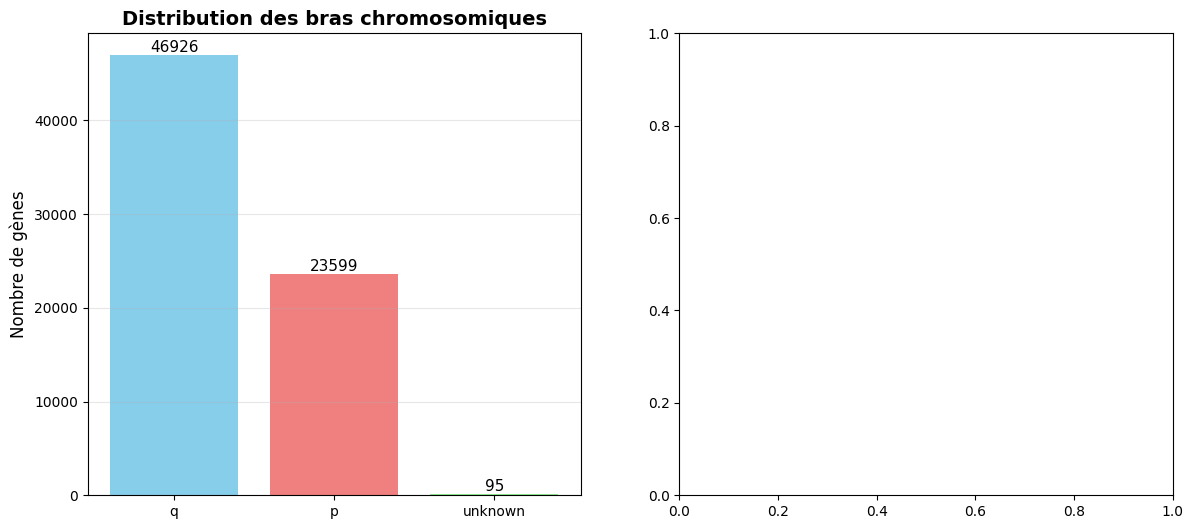

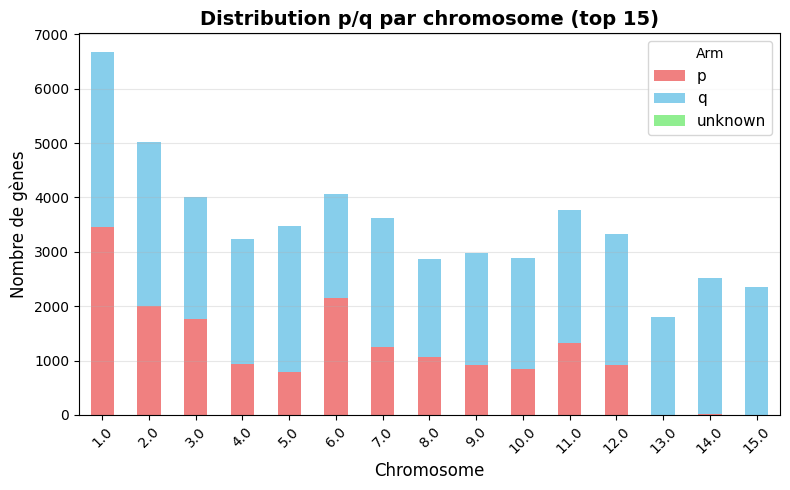

In [29]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
arm_counts = df['arm'].value_counts()
colors = ['lightcoral' if x == 'p' else 'skyblue' if x == 'q' else 'lightgreen' for x in arm_counts.index]
bars = plt.bar(range(len(arm_counts)), arm_counts.values, color=colors)
plt.xticks(range(len(arm_counts)), arm_counts.index)
plt.title('Distribution des bras chromosomiques', fontsize=14, fontweight='bold')
plt.ylabel('Nombre de gènes', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, arm_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            f'{count}', ha='center', va='bottom', fontsize=11)

plt.subplot(1, 2, 2)
pivot_data = df.groupby(['chromosome', 'arm']).size().unstack().fillna(0)
pivot_data.head(15).plot(kind='bar', stacked=True,
                        color=['lightcoral', 'skyblue', 'lightgreen'],
                        figsize=(8, 5))
plt.title('Distribution p/q par chromosome (top 15)', fontsize=14, fontweight='bold')
plt.xlabel('Chromosome', fontsize=12)
plt.ylabel('Nombre de gènes', fontsize=12)
plt.legend(title='Arm', fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

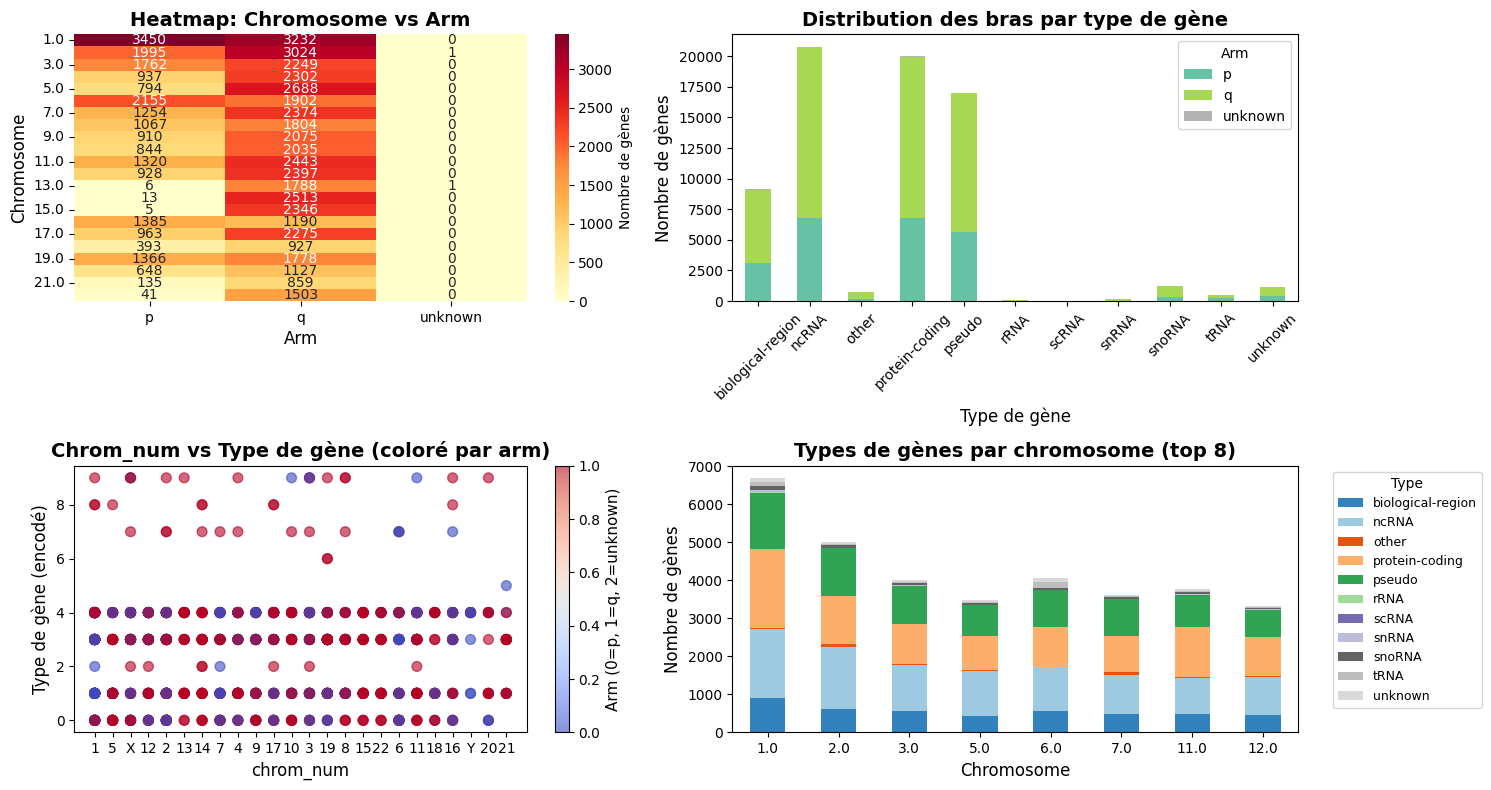

In [30]:
plt.figure(figsize=(15, 8))

# Heatmap chromosome vs arm
pivot_table = pd.crosstab(df['chromosome'], df['arm'])
plt.subplot(2, 2, 1)
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Nombre de gènes'})
plt.title('Heatmap: Chromosome vs Arm', fontsize=14, fontweight='bold')
plt.xlabel('Arm', fontsize=12)
plt.ylabel('Chromosome', fontsize=12)

# Distribution des bras par type de gène
plt.subplot(2, 2, 2)
arm_by_type = pd.crosstab(df['type_of_gene'], df['arm'])
arm_by_type.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('Distribution des bras par type de gène', fontsize=14, fontweight='bold')
plt.xlabel('Type de gène', fontsize=12)
plt.ylabel('Nombre de gènes', fontsize=12)
plt.legend(title='Arm', fontsize=10)
plt.xticks(rotation=45)

# Scatter plot chrom_num vs type_of_gene coloré par arm
plt.subplot(2, 2, 3)
if len(df) > 1000:
    sample = df.sample(1000, random_state=42)
else:
    sample = df

scatter = plt.scatter(sample['chrom_num'], sample['type_of_gene'].astype('category').cat.codes,
                     c=sample['arm'].map({'p': 0, 'q': 1, 'unknown': 2}).fillna(2),
                     cmap='coolwarm', alpha=0.6, s=50)
plt.title('Chrom_num vs Type de gène (coloré par arm)', fontsize=14, fontweight='bold')
plt.xlabel('chrom_num', fontsize=12)
plt.ylabel('Type de gène (encodé)', fontsize=12)
cbar = plt.colorbar(scatter)
cbar.set_label('Arm (0=p, 1=q, 2=unknown)', fontsize=11)

# Distribution des types de gènes par chromosome
plt.subplot(2, 2, 4)
top_chromosomes = df['chromosome'].value_counts().head(8).index
top_df = df[df['chromosome'].isin(top_chromosomes)]
type_by_chrom = pd.crosstab(top_df['chromosome'], top_df['type_of_gene'])
type_by_chrom.plot(kind='bar', stacked=True, colormap='tab20c', ax=plt.gca())
plt.title('Types de gènes par chromosome (top 8)', fontsize=14, fontweight='bold')
plt.xlabel('Chromosome', fontsize=12)
plt.ylabel('Nombre de gènes', fontsize=12)
plt.legend(title='Type', fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

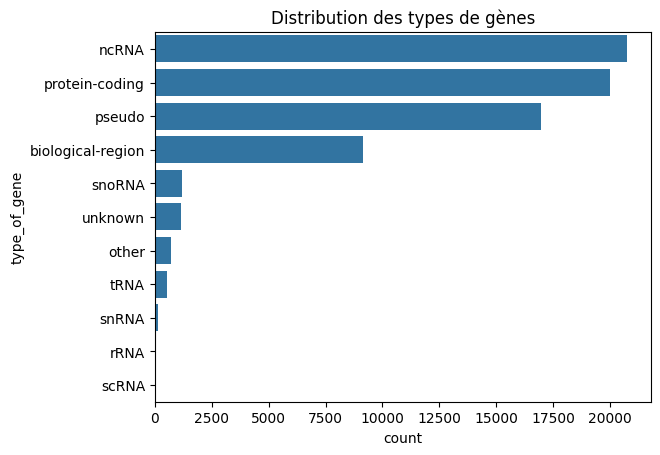

In [9]:
# Analyse de la colonne type_of_gene
sns.countplot(data=df, y='type_of_gene', order=df['type_of_gene'].value_counts().index)
plt.title('Distribution des types de gènes')
plt.show()

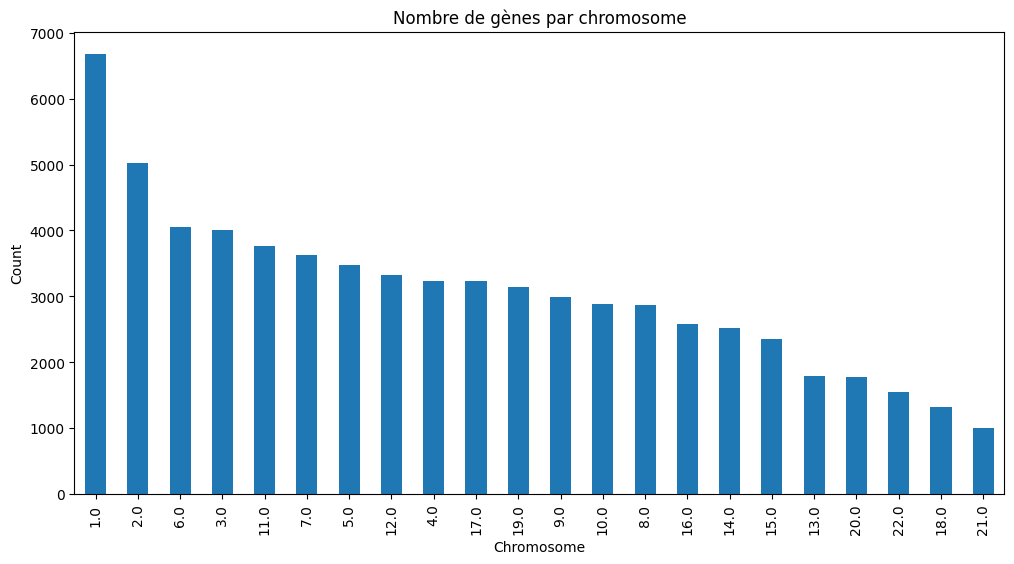

In [11]:
#Répartition chromosomique:
df['chromosome'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Nombre de gènes par chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.show()

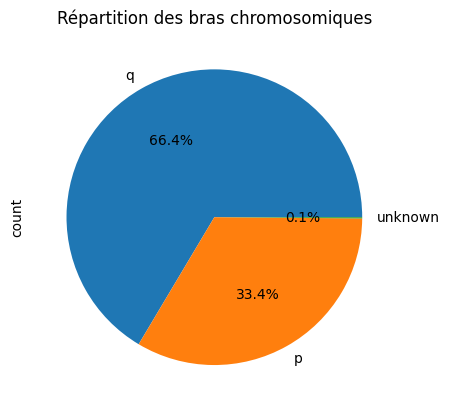

In [12]:
#Analyse des bras chromosomiques (p/q):
df['arm'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des bras chromosomiques')
plt.show()

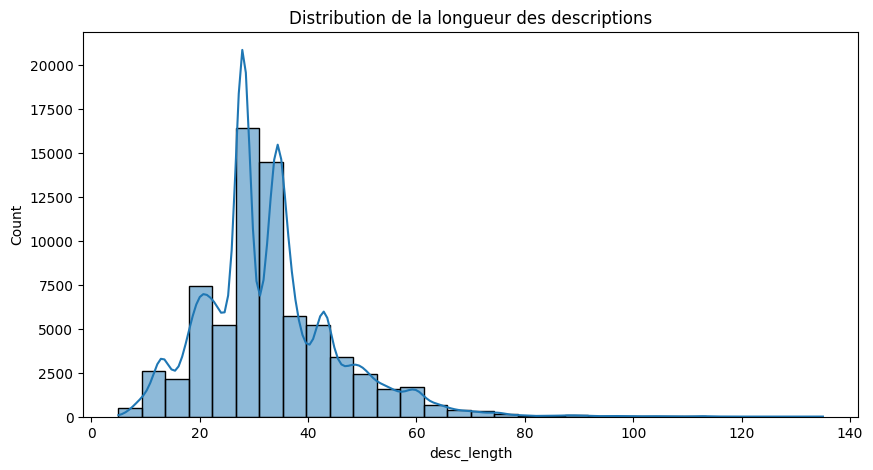

In [13]:
#Longueur des descriptions (desc_length):
plt.figure(figsize=(10,5))
sns.histplot(df['desc_length'], bins=30, kde=True)
plt.title('Distribution de la longueur des descriptions')
plt.show()

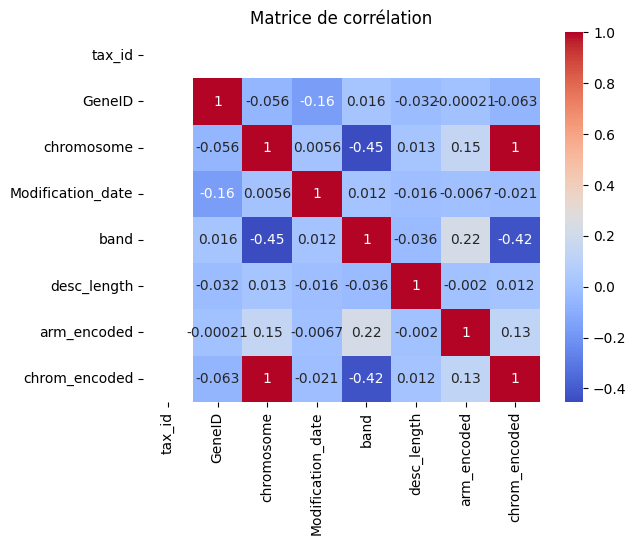

In [14]:
#Corrélations entre variables numériques:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [15]:
#Analyse des gènes de type protein-coding vs pseudo:
coding = df[df['type_protein-coding'] == True].shape[0]
pseudo = df[df['type_pseudo'] == True].shape[0]
other = df.shape[0] - coding - pseudo

print(f"Protein-coding: {coding}")
print(f"Pseudogenes: {pseudo}")
print(f"Autres: {other}")

Protein-coding: 19995
Pseudogenes: 16976
Autres: 33649


Pairplot en cours...


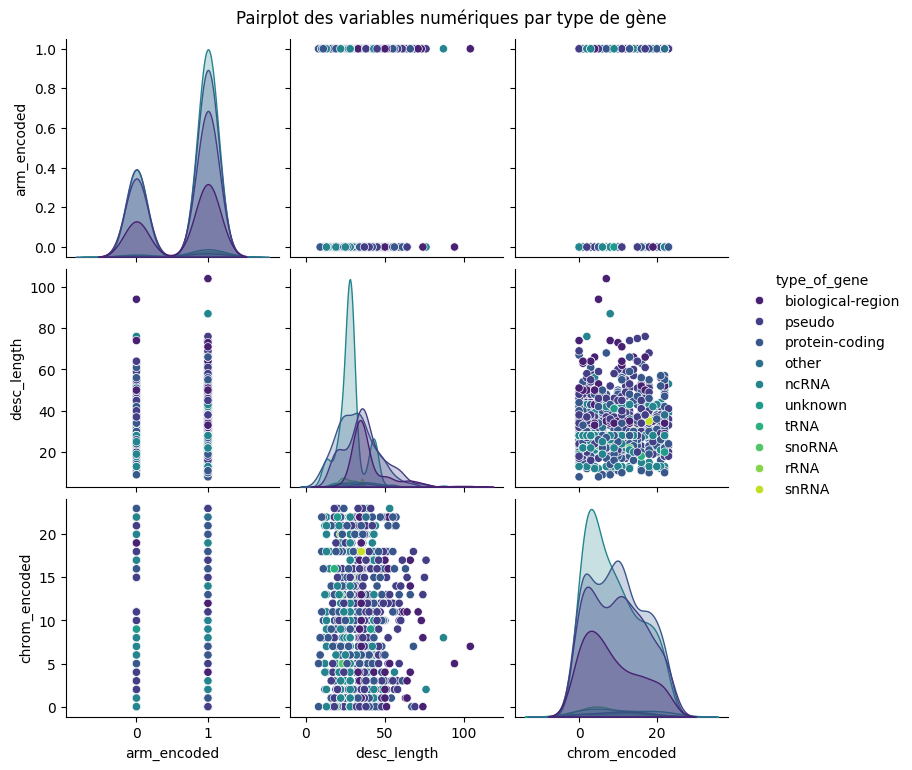

In [18]:

# Sélectionner quelques colonnes numériques intéressantes
numeric_cols_for_pairplot = ['chrom_num', 'arm_encoded', 'desc_length', 'chrom_encoded']
pairplot_df = df[numeric_cols_for_pairplot + ['type_of_gene']].copy()

# Prendre un échantillon si le dataset est très grand (pour éviter les temps de calcul longs)
if len(pairplot_df) > 1000:
    pairplot_df = pairplot_df.sample(1000, random_state=42)

print("Pairplot en cours...")
sns.pairplot(pairplot_df, hue='type_of_gene', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot des variables numériques par type de gène', y=1.02)
plt.show()
